In [19]:
#librerias del frameword de q-inspire
import pennylane as qml
from pennylane import numpy as np
from pennylane import AdamOptimizer
from pennylane_quantuminspire.qi_device import QIDevice
from qiskit_quantuminspire.qi_provider import QIProvider

#librerias genericas (clasicas)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
# Filtramos solo las clases 1 y 2 
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Reetiquetamos: Versicolor = 0, Virginica = 1
y = (y == 2).astype(int)

print("Shape filtrado de X:", X.shape)
print("Clases después del filtrado:", np.unique(y))  # [0 1]


Shape filtrado de X: (100, 4)
Clases después del filtrado: [0 1]


In [7]:
X = X[:, [2, 3]]  # Usamos petal length y petal width

print("Shape final de X:", X.shape)  # (100, 2)

Shape final de X: (100, 2)


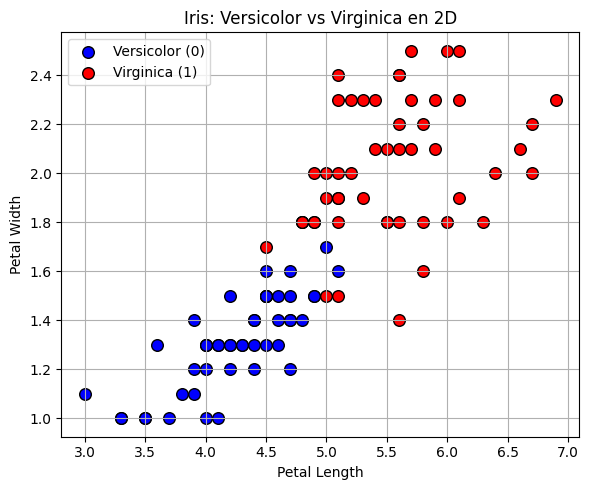

In [8]:
plt.figure(figsize=(6, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Versicolor (0)', edgecolor='k', s=70)
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Virginica (1)', edgecolor='k', s=70)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris: Versicolor vs Virginica en 2D")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

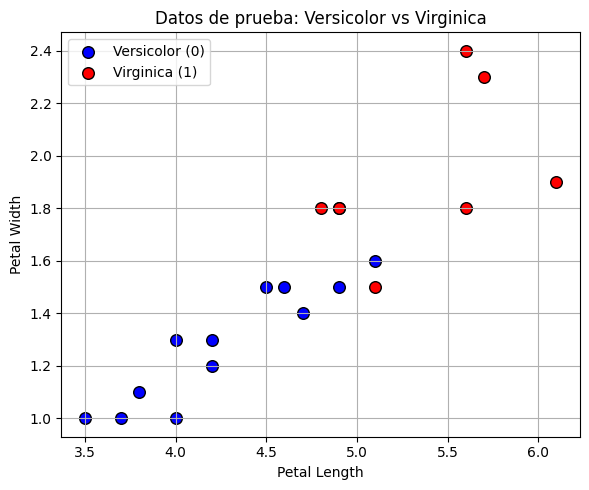

In [13]:
plt.figure(figsize=(6, 5))
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            color='blue', label='Versicolor (0)', edgecolor='k', s=70)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color='red', label='Virginica (1)', edgecolor='k', s=70)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Datos de prueba: Versicolor vs Virginica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [20]:
provider = QIProvider()
backend = provider.get_backend('Tuna-5')
demo_device = QIDevice(backend)
dev = demo_device

In [21]:
@qml.qnode(dev)
def tuna5_model(params, x, bias):
    angle = np.dot(params, x) + bias
    qml.RX(angle, wires=0)
    qml.RX(angle,wires=0)
    qml.RX(angle,wires=0)
    return qml.probs(wires=0)